In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('/content/OnlineRetail.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA', nan], dtype=object)

In [9]:
# Stripping extra spaces in the description
data['Description'] = data['Description'].str.strip()

# Dropping the rows without any invoice number
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

# Dropping all transactions which were done on credit
data = data[~data['InvoiceNo'].str.contains('C')]

In [10]:
# Transactions done in France
basket_France = (data[data['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Transactions done in the United Kingdom
basket_UK = (data[data['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Transactions done in Portugal
basket_Por = (data[data['Country'] =="Portugal"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_Sweden = (data[data['Country'] =="Sweden"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [11]:
#Printing dataset of France
basket_France.head

<bound method NDFrame.head of Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                          0.0                         0.0   
536852                          0.0                         0.0   
536974                          0.0                         0.0   
537065                          0.0                         0.0   
537463                          0.0                         0.0   
...                             ...                         ...   
573891                          0.0                         0.0   
574068                          0.0                         0.0   
574093                          0.0                         0.0   
574104                          0.0                         0.0   
574252                          0.0                         0.0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                             0.0                              0.0   
536852                             0.0                              0.0   
536974                             0.0                              0.0   
537065                             0.0                              0.0   
537463                             0.0                              0.0   
...                                ...                              ...   
573891                             0.0                              0.0   
574068                             0.0                              0.0   
574093                             0.0                              0.0   
574104                             0.0                              0.0   
574252                             0.0                              0.0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   
...                                    ...   
573891                                 0.0   
574068                                 0.0   
574093                                 0.0   
574104                                 0.0   
574252                                 0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                       0.0                          0.0   
536852                                       0.0                          0.0   
536974                                       0.0                          0.0   
537065                                       0.0                          0.0   
537463                                       0.0                          0.0   
...                                          ...                          ...   
573891                                       0.0                          0.0   
574068                                       0.0                          0.0   
574093                                       0.0                          0.0   
574104                                       0.0                          0.0   
574252                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                             0.0                                 0.0   
536852                             0.0                                 0.0   
536974                             0.0                                 0.0   
537065                             0.0                                 0.0   
5

In [12]:
#Specifying the rules
def one_hot_encode(x):
    if x>=1:
        return 1
    else:
        return 0

In [13]:
# Encoding the datasets
basket_encoded = basket_France.applymap(one_hot_encode)
basket_France = basket_encoded

basket_encoded = basket_UK.applymap(one_hot_encode)
basket_UK = basket_encoded

basket_encoded = basket_Por.applymap(one_hot_encode)
basket_Por = basket_encoded

basket_encoded = basket_Sweden.applymap(one_hot_encode)
basket_Sweden = basket_encoded

In [14]:
# Building the model
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                           antecedents consequents  \
48                        (JUMBO BAG WOODLAND ANIMALS)   (POSTAGE)   
153                                (RED RETROSPOT CUP)   (POSTAGE)   
189                     (TABLECLOTH RED APPLES DESIGN)   (POSTAGE)   
295  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   (POSTAGE)   
307  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   (POSTAGE)   

     antecedent support  consequent support   support  confidence      lift  \
48             0.072555            0.760252  0.072555         1.0  1.315353   
153            0.056782            0.760252  0.056782         1.0  1.315353   
189            0.059937            0.760252  0.059937         1.0  1.315353   
295            0.053628            0.760252  0.053628         1.0  1.315353   
307            0.050473            0.760252  0.050473         1.0  1.315353   

     leverage  conviction  zhangs_metric  
48   0.017395         inf       0.258503  
153  0.013613     

In [17]:
#Inferred rules for France
frq_items = apriori(basket_Por, min_support = 0.05, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


                                            antecedents  \
206               (WOODEN HEART CHRISTMAS SCANDINAVIAN)   
207                     (CHRISTMAS RETROSPOT STAR WOOD)   
974                           (TRAVEL CARD WALLET SUKI)   
975                      (TRAVEL CARD WALLET RETROSPOT)   
1045  (WOODEN HEART CHRISTMAS SCANDINAVIAN, BAKING S...   

                                consequents  antecedent support  \
206         (CHRISTMAS RETROSPOT STAR WOOD)            0.066667   
207   (WOODEN HEART CHRISTMAS SCANDINAVIAN)            0.066667   
974          (TRAVEL CARD WALLET RETROSPOT)            0.066667   
975               (TRAVEL CARD WALLET SUKI)            0.066667   
1045        (CHRISTMAS RETROSPOT STAR WOOD)            0.066667   

      consequent support   support  confidence  lift  leverage  conviction  \
206             0.066667  0.066667         1.0  15.0  0.062222         inf   
207             0.066667  0.066667         1.0  15.0  0.062222         inf   
974     

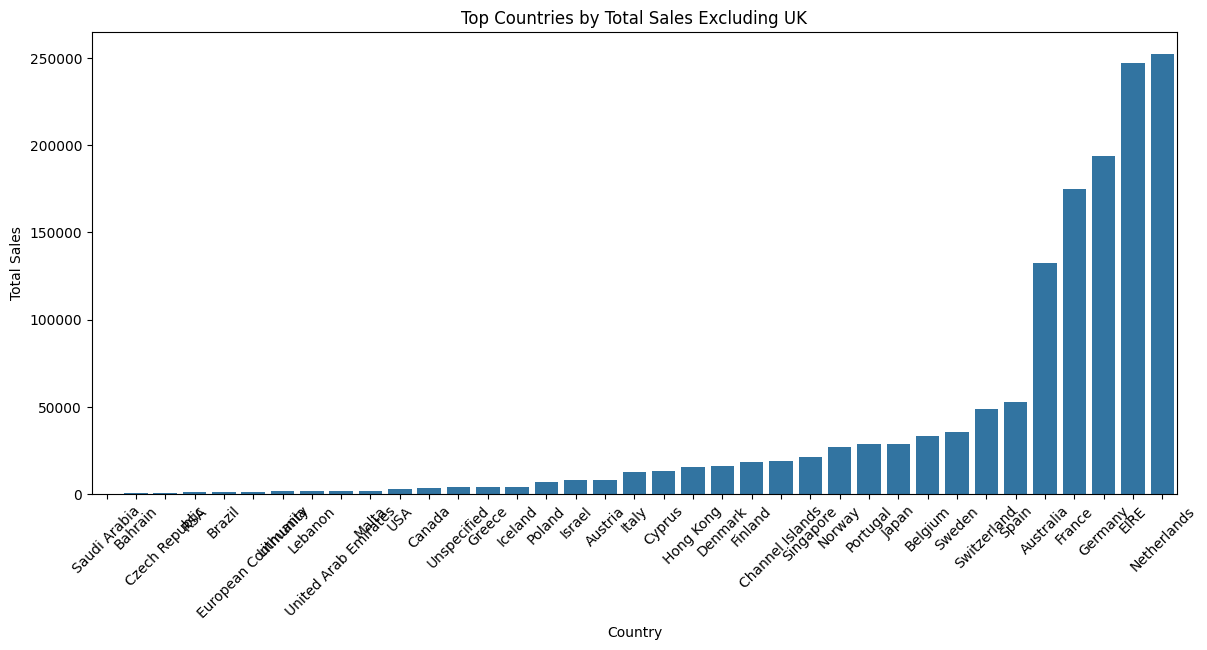

In [18]:
# Calculate the total sales
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Visualize the top countries by total sales without UK
top_countries = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=True).head(-1)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top Countries by Total Sales Excluding UK')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

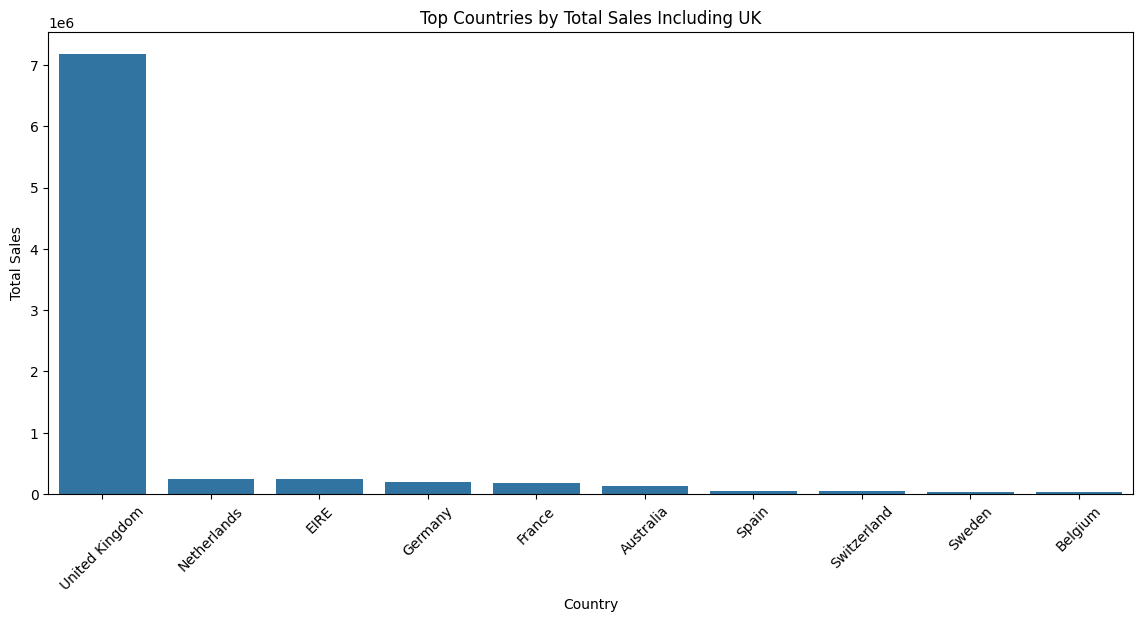

In [19]:
# Visualize the top countries by total sales with UK
top_countries = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top Countries by Total Sales Including UK')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

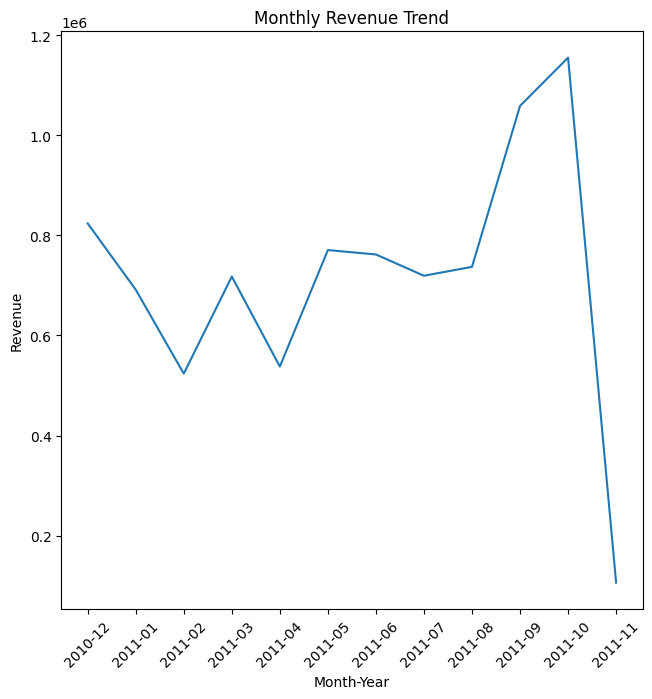

In [20]:
# Convert 'InvoiceDate' to datetime if it's not already
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract month and year from 'InvoiceDate' column
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

# Calculate the monthly revenue
monthly_revenue = data.groupby('MonthYear')['TotalSales'].sum()

# Visualize the monthly revenue trend
plt.figure(figsize=(7.5,7.5))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

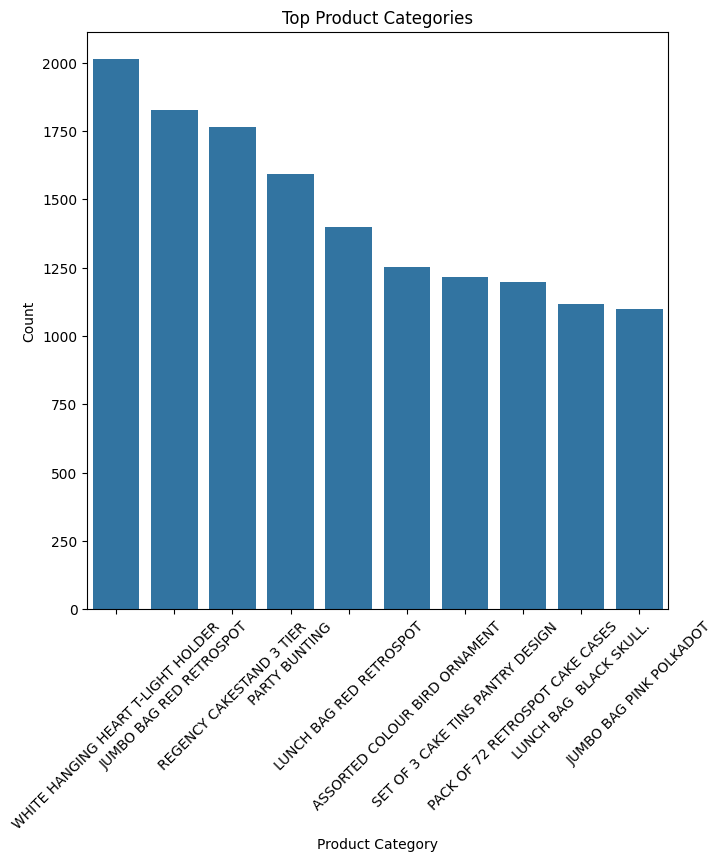

In [21]:
# Visualize the product categories
top_categories = data['Description'].value_counts().head(10)
plt.figure(figsize=(7.5,7.5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Description'>

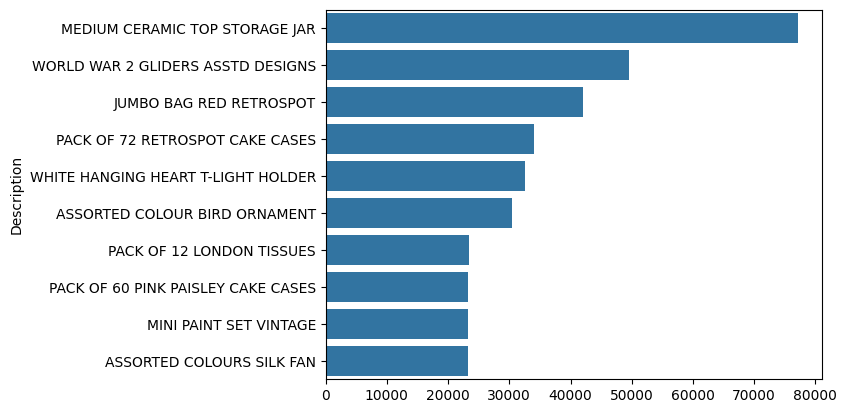

In [22]:
# Visualize the top selling products
top_products = data.groupby('Description')['Quantity'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index)

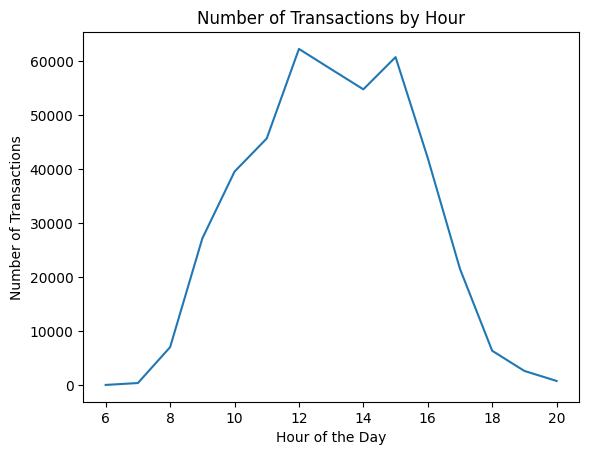

In [23]:
# Visualize transaction count per depending on the hour of day
data['Hour'] = data['InvoiceDate'].dt.hour
transactions_by_hour = data.groupby('Hour')['InvoiceNo'].count()
plt.plot(transactions_by_hour.index, transactions_by_hour.values)

plt.title('Number of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()